<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

$\sigma(x) = \frac{\exp(x)}{exp(x) + 1}$


$\sigma(x)' = \sigma(x)(1 - \sigma(x))$


$\hat{y} = \sigma(\sigma(x \cdot W_1) \cdot W_2)$


$L(y, \hat{y}) = \Sigma(y - \hat{y})^2$

In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [323]:
class NeuralNet():
    def __init__(self):
        self.x = None
        self.y = None
        self.w1 = None
        self.w2 = None
        self.h1 = None
        self.o = None
        self.loss_record = []
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.w1 = np.random.rand(self.x.shape[1], 4)
        self.w2 = np.random.rand(4, 1)
        self.o = np.zeros(self.y.shape[0])
        
    def _sigmoid(self, x):
        return np.exp(x)/(np.exp(x) + 1)
    
    def _sigmoid_d(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def _feedforward(self):
        self.h1 = self._sigmoid(np.dot(self.x, self.w1))
        self.o = self._sigmoid(np.dot(self.h1, self.w2))
        return self.o
        
    def _backprop(self):      
        dw1 = np.dot(self.x.T, np.dot(2 * (self.y -self.o) * self._sigmoid_d(self.o), self.w2.T) * self._sigmoid_d(self.h1))
        dw2 = np.dot(self.h1.T, (2 * (self.y - self.o)) * self._sigmoid_d(self.o))  
        
        self.w1 += dw1
        self.w2 += dw2
         
    def _calc_loss(self):
        return np.mean(np.square(self.y - self.o))
 
    def train(self, epochs):
        for i in range(epochs):
            self._feedforward()
            self._backprop()
            self.loss_record.append(self._calc_loss())
            
    def plot_training(self):
        plt.plot(range(len(self.loss_record)), self.loss_record)
        plt.show()
        
    def predict(self, x):
        self.x = x
        return self._feedforward()

In [330]:
X = np.asarray([[0, 0, 0],
                [0, 1, 1],
                [1, 0, 1],
                [1, 1, 1]])
Y = np.asarray([0, 1, 1, 0]).reshape((4,1))

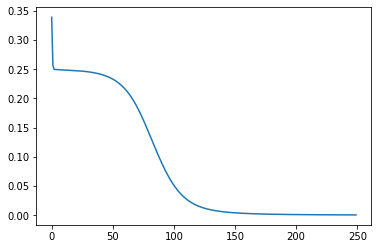

In [331]:
nn = NeuralNet()
nn.fit(X, Y)
nn.train(250)
nn.plot_training()

In [332]:
nn.o

array([[0.01192164],
       [0.97815379],
       [0.97791377],
       [0.02516828]])

In [333]:
X = np.asarray([[1, 0, 0]])
nn.predict(X)

array([[7.60348047e-06]])